In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [86]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [6]:
df.head()


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


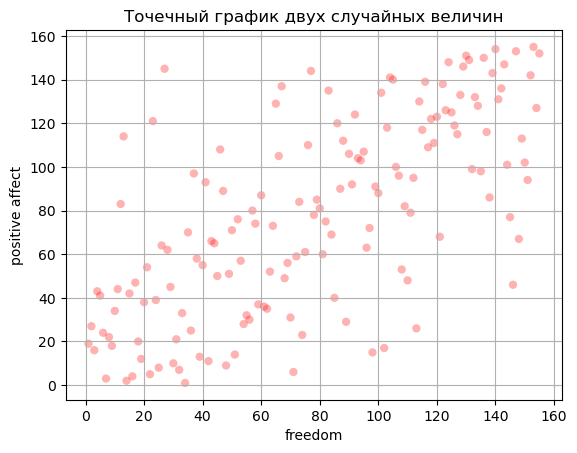

In [67]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='red', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.title('Точечный график двух случайных величин')
plt.show()

Медиана, мода, математическое ожидание, стандартное отклонение,  дисперсия, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [68]:
freedom1 = freedom[~np.isnan(freedom)]
p_affect = positive_affect[~np.isnan(positive_affect)]
exp_value = statistics.mean(freedom1)
print(exp_value)
median = statistics.median(freedom1)
print(median)
mode = statistics.mode(freedom1)
print(mode)
print(min(freedom1))
print(max(freedom1))
print(f'Размах = {max(freedom1)-min(freedom1)}')
print(statistics.pstdev(freedom1))
print(statistics.pvariance(freedom1))

78.0
78.0
5.0
1.0
155.0
Размах = 154.0
44.74371464239419
2002.0


Корреляция между Freedom и positive affect

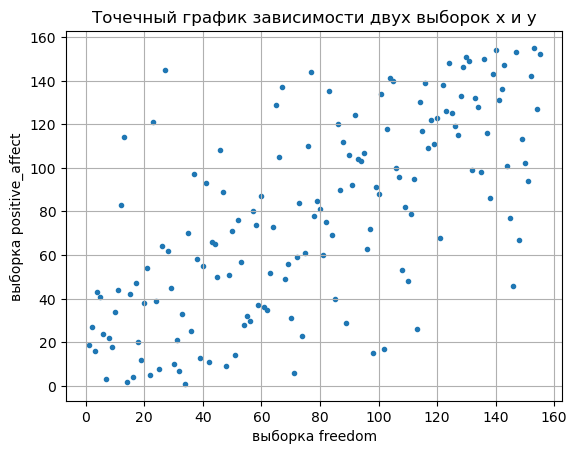

In [59]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive_affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')


In [71]:
print(len(p_affect))

155


Коэффициент корреляции Пирсона: 0.6817698430601657


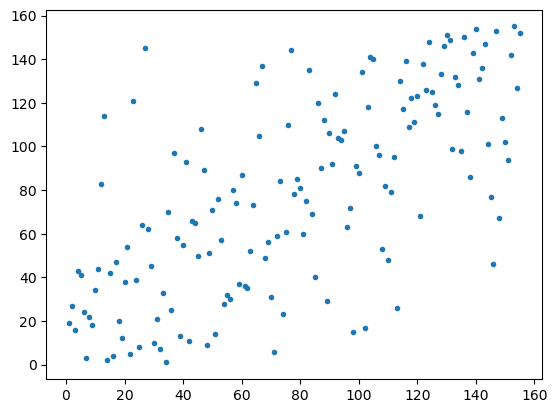

In [73]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom1, p_affect)
plt.scatter(freedom1, p_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализация данных колонки Freedom (централизация + масштабирование)

In [78]:
freedom_ts = freedom1 - statistics.mean(freedom1)
print (statistics.mean(freedom_ts))
print(min(freedom_ts))
print(max(freedom_ts))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom2 = min_max_scaler.fit_transform(np.array(freedom_ts).reshape(-1, 1))
print(min(freedom2))
print(max(freedom2))

0.0
-77.0
77.0
[-1.]
[1.]


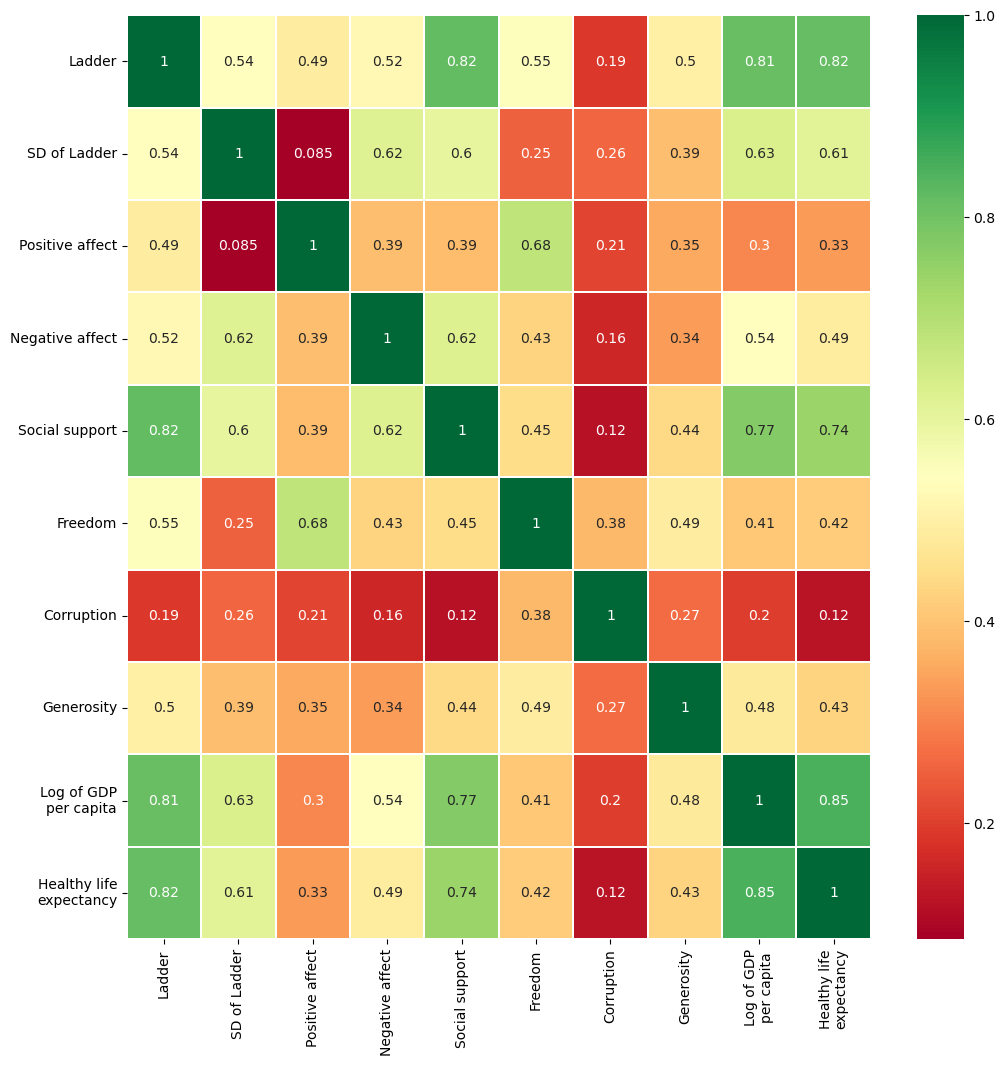

In [87]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [5]:
df1=pd.read_csv('/Users/pavelpomelov/Downloads/avocado.csv')
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. 

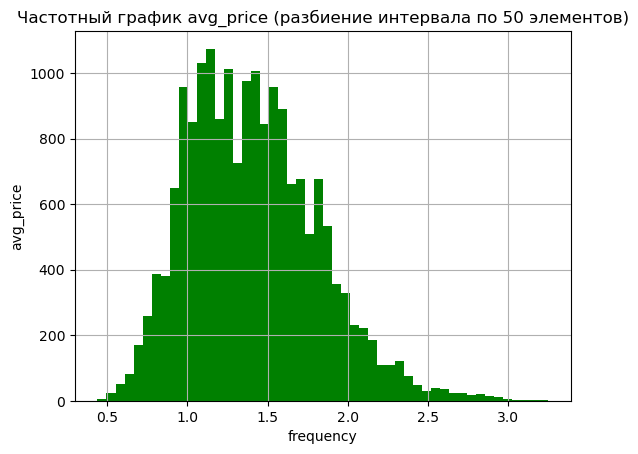

In [6]:
av_price = df1['AveragePrice']
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(av_price, 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_price')
plt.title('Частотный график avg_price (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [9]:
av_price = df1['AveragePrice']
print(av_price)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64


In [7]:
# Корреляция
df2 = df1.iloc[:, [2, 4, 5 , 6]]
df2.corr()

,AveragePrice,4046,4225,4770
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446
4046,-0.208317,1.000000,0.926110,0.833389
4225,-0.172928,0.926110,1.000000,0.887855
4770,-0.179446,0.833389,0.887855,1.000000
